## Complex Rhythms


Within **maelzel.core** notes/chords have a duration in
quarternotes. There is no concept of tuplet or any idea of
encapsulation of durations (tuplets). The notational aspect
of rhythm (how a note is represented as notation) is determined by a
**quantization** step, which, even if highly configurable, is not directly 
controlled by the user

Nevertheless, it is possible to input complex rhythms and the
quantizer will try to render an accurate transcription of
it. For example complex tuplets are quantized as expected:


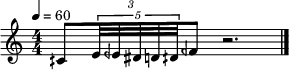

In [1]:
from maelzel.core import *

v = Chain([
    Note("4C+!", dur=F(1, 3)),

    Note("4E",  dur=F(1, 3)*F(1, 5)),
    Note("4E-", dur=F(1, 3)*F(1, 5)),
    Note("4Eb", dur=F(1, 3)*F(1, 5)),
    Note("4D",  dur=F(1, 3)*F(1, 5)),
    Note("4D+", dur=F(1, 3)*F(1, 5)),

    Note("4F-", dur=F(1, 3)),
])
v.show()

## Ferneyhough's Third String Quartet, violin 1

![](pics/ferney1-orig.jpg)

If not explicitely commanded to do so the quantizer is not able to find irregular tuplets (tuplets where the denominator is not a power of two) as the best rhythmical representation for most passages. In this case the `5:3` tuplet in measure 1 is represented as a *64th* `5:4` tuplet, which is mathematically accurate. The rest of the rhythms are recognized correctly, even when dealing with unusual time signatures like *11/6*

Voice([Rest:0.375♩, Rest:0.15♩, ‹5F- 5G 0.225♩›, ‹5F- 5G 0.317♩ gliss=6F,6F#›, Rest:1♩, 4C#:0.0833♩:offset=3, 4E:0.0833♩, 4C:0.0833♩, 4D:0.0833♩, ‹4D+ 4Eb 1.42♩ offset=3.75›, …], offset=0)
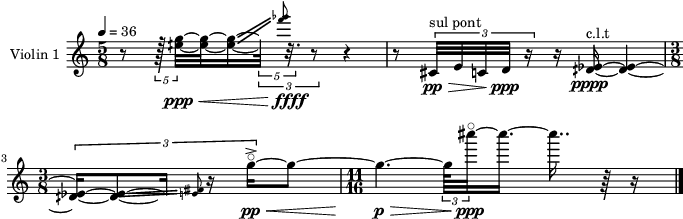

In [3]:
from maelzel.core import *
from fractions import Fraction as F

resetImageCache()

struct = ScoreStruct(
    title="Third String Quartet",
    score=r'''
    5/8, 36
    .
    3/8
    11/16
    5/8
    4/8
    .
''')

conf = getConfig()
conf['quant.debug'] = False
conf['quant.complexity'] = 'high'
conf['quant.debugShowNumRows'] = 20

setScoreStruct(struct)

v1 = [
    Rest(F(3, 8)),
    Rest(F(1, 4)*F(3, 5)),
    # The ! sign after the notename fixes the enharmonic representation to the notename given
    Chord("5G 5E+!", dur=F(3, 8)*F(3, 5), tied=True, dynamic='ppp'),  
    Chord("5G 5E+", dur=F(1, 4)*F(3, 5)+F(1, 4)*F(2, 3), gliss="6F 6Gb"),
    Rest(1, dynamic='ffff'),
    Note("4C#", offset=struct.locationToBeat(1, 0.5), dur=1/8*F(2,3), dynamic='pp',
         label='sul pont'),
    Note("4E", dur=1/8*F(2,3)),
    Note("4C", dur=1/8*F(2,3)),
    Note("4D", dur=1/8*F(2,3), dynamic='ppp'),
    Chord("4Eb 4D+", offset=struct.locationToBeat(1, 1.25), dur=1+0.25+0.25*F(2,3), tied=True,
          dynamic='pppp', label='c.l.t'),
    Chord("4Eb 4D+", dur=0.5*F(2,3)+F(1, 4)*F(2, 3), gliss=True),
    Chord('4E 4G-', 0),
    Note("5G", 
         offset=struct.locationToBeat(2, F(5, 6)), 
         dur=F(1, 6)+F(1, 2),
         tied=True,
         dynamic='pp',        
         ).addSymbol('articulation', '>').addSymbol('harmonic', 'sounding').addSpanner('<'),
    Note("5G", 1.5 + F(1,16)*F(2,3), dynamic='p').addSpanner(">"), 
    Note("7C#", 1/8*F(2,3)+1/4*1.5+1/4*1.75, dynamic='ppp').addSymbol('harmonic', 'sounding')   
]
V1 = Voice(v1, 'Violin 1')

# A hairpin can also be added afterwords
V1[2].addSpanner('<', v1[4])
V1[5].addSpanner('>', v1[8])

# Within a jupyter notebook any object evaluated as last within a cell
# will show html including rendered notation
V1


The same fragment with a lower rhythmic complexity:

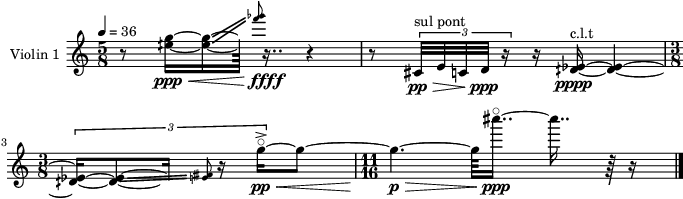

In [10]:
with CoreConfig(updates={'quant.complexity': 'low'}):
    V1.show()

In [ ]:
CoreConfig(quant_complexity='low')